In [1]:
import h5py    
import numpy as np  
import pandas as pd
from pylab import savefig
from sklearn.ensemble import IsolationForest
from pylab import *

In [2]:
f= pd.read_hdf('train.hdf5')

In [3]:
f

,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,0.032573,...,0.034744,-0.007600,-0.003257,0.065145,0.047773,-0.009772,0.031487,0.096632,0.077089,0.040173
1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,0.281210,...,0.260581,-0.004343,-0.241037,-0.636252,-0.953292,-0.980436,-0.846888,-0.838202,-0.880546,-0.739398
2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,-0.054871,...,0.040884,0.375490,0.699337,0.965085,1.086662,1.132926,1.279249,1.296464,0.937112,0.451879
3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,0.154837,...,-0.286936,-0.171079,-0.036814,-0.024904,0.031400,0.140761,-0.011911,-0.173244,-0.063884,0.081208
4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,0.931577,...,1.009751,1.134613,0.836030,0.479903,0.109661,-0.285553,-0.628651,-0.916376,-1.010837,-0.804544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,-0.063989,0.017228,0.015997,-0.321177,-0.503300,-0.535295,-0.562367,-0.600515,-0.573442,-0.317485,...,-0.121826,-0.134131,-0.111981,-0.057836,-0.073834,-0.125517,-0.082448,-0.036917,-0.114442,-0.183354
1673,0.993037,0.726052,0.341885,0.286314,0.535177,0.605245,0.198124,-0.375711,-0.579875,-0.495310,...,0.038658,0.188460,0.273025,0.045907,-0.108727,0.072484,0.415577,0.356382,-0.096646,-0.280273
1674,0.570550,0.253578,-0.193841,-0.502279,-0.657108,-0.838757,-0.971642,-0.881427,-0.700996,-0.520566,...,-0.146295,0.128008,0.162143,0.018287,-0.017068,0.087777,0.062175,-0.041450,-0.140199,-0.247482
1675,0.630677,0.605010,0.477897,0.155225,-0.441229,-0.679566,-0.515786,-0.424118,-0.183336,0.394784,...,0.229781,-0.041556,-0.176003,-0.301894,-0.177225,0.033001,0.025667,0.088001,0.206559,0.003667


In [4]:
t=array(f)

In [5]:
t.shape

(1677, 61440)

In [6]:
t

array([[ 0.04125864,  0.04125864,  0.03257261, ...,  0.09663208,
         0.07708851,  0.04017289],
       [-0.21172198, -0.26492391, -0.2746957 , ..., -0.83820187,
        -0.88054628, -0.73939828],
       [ 0.21410477,  0.1549301 ,  0.13663973, ...,  1.29646364,
         0.93711189,  0.45187944],
       ...,
       [ 0.57054995,  0.25357776, -0.19384069, ..., -0.04145021,
        -0.14019924, -0.24748214],
       [ 0.63067681,  0.60500973,  0.47789657, ...,  0.08800142,
         0.20655888,  0.00366673],
       [ 0.08390965,  0.04442275,  0.04442275, ...,  0.08144171,
         0.08390965,  0.08761154]])

In [7]:
temps=np.linspace(0,61440/1000,61440)
temps

array([0.00000000e+00, 1.00001628e-03, 2.00003255e-03, ...,
       6.14380000e+01, 6.14390000e+01, 6.14400000e+01])

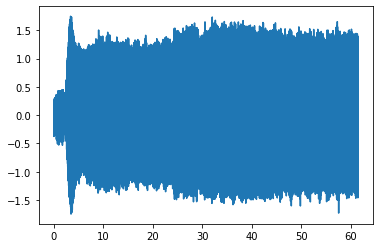

In [10]:
plot(temps,t[2])

In [11]:
import pywt
from pywt import wavedec

from statsmodels.robust import mad

In [21]:
wf = "haar"

Coeff = []
TCoeff = []
for x in t :
    #Apply wavelet decomposition
    coeffs = pywt.wavedec(x,wf,level=7)
    coeffs_flatten = np.hstack(coeffs)
    Coeff.append(coeffs_flatten)
    
    # Compute universal Threshold http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/
    sigma = mad(coeffs[-1])
    uthresh = sigma*np.sqrt(2*np.log(128))
    # Apply Threshold on 4 last levels
    coeffs_thresh = [pywt.threshold(c, uthresh, mode="hard") if i<=3 else c for i,c in enumerate(coeffs[::-1])]
    coeffs_thresh_flatten = np.hstack(coeffs_thresh[::-1])
    TCoeff.append(coeffs_thresh_flatten)
    
Coeff = np.array(Coeff)
TCoeff = np.array(TCoeff)
print(Coeff.shape, TCoeff.shape)
print(np.sum(Coeff!=0), np.sum(TCoeff!=0))

(1677, 61440) (1677, 61440)
102910729 17857979


In [22]:
#IsolationForest?

In [23]:

clf = IsolationForest(behaviour='new')
clf.fit(Coeff)
v=pd.read_hdf('validation.hdf5')
v=pd.DataFrame(v)
res=clf.predict(v)
for i in range(len(res)) : 
    if res[i]==1 : 
        res[i]=0
    else :
        res[i]= 1 


C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


MemoryError: Unable to allocate array with shape (1677, 61440) and data type float32

In [ ]:
res=pd.DataFrame(res.T)
res.to_csv('IsolationForest_Wavelet7.csv',sep = ';', mode = 'w',index=True,header=['anomaly'])

In [ ]:
sum(res)
